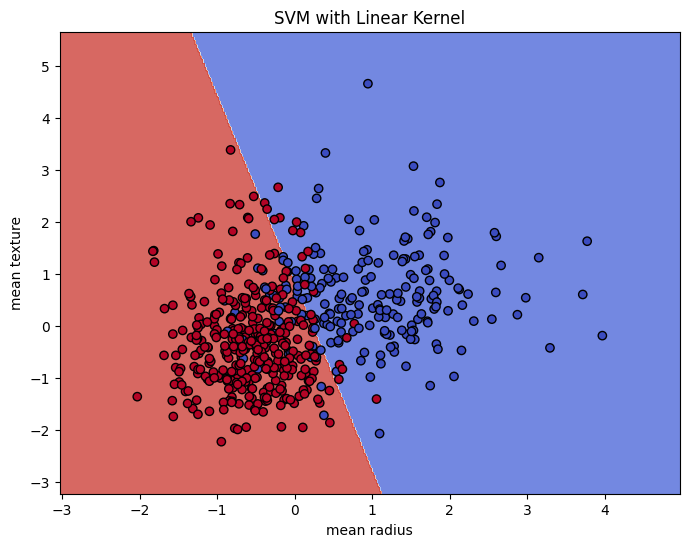

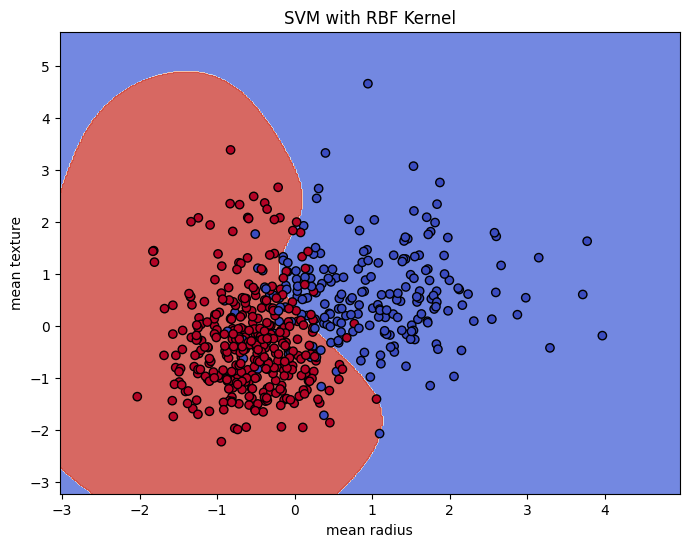

Linear Kernel SVM
[[36  7]
 [ 4 67]]
              precision    recall  f1-score   support

   malignant       0.90      0.84      0.87        43
      benign       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

RBF Kernel SVM
[[38  5]
 [ 4 67]]
              precision    recall  f1-score   support

   malignant       0.90      0.88      0.89        43
      benign       0.93      0.94      0.94        71

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters from GridSearchCV: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Estimator Evaluation:
[[38  5]
 [ 5 66]]
              precision    recall  f1-score   support

   malignant       0.88      0.88    

In [1]:
# Task 7: SVM Classification using Breast Cancer Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load dataset
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target
target_names = data.target_names

# Use only two features for 2D visualization
X_vis = X[:, :2]

# 2. Normalize features
scaler = StandardScaler()
X_vis_scaled = scaler.fit_transform(X_vis)

# 3. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vis_scaled, y, test_size=0.2, random_state=42)

# 4. Train SVM with linear kernel
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# 5. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)

# 6. Function to plot decision boundary
def plot_decision_boundary(model, title):
    h = .02
    x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
    y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel(data.feature_names[0])
    plt.ylabel(data.feature_names[1])
    plt.title(title)
    plt.show()

# 7. Plot decision boundaries
plot_decision_boundary(svm_linear, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, "SVM with RBF Kernel")

# 8. Evaluation
print("Linear Kernel SVM")
print(confusion_matrix(y_test, svm_linear.predict(X_test)))
print(classification_report(y_test, svm_linear.predict(X_test), target_names=target_names))

print("RBF Kernel SVM")
print(confusion_matrix(y_test, svm_rbf.predict(X_test)))
print(classification_report(y_test, svm_rbf.predict(X_test), target_names=target_names))

# 9. Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

print(f"Best Parameters from GridSearchCV: {grid.best_params_}")
print("Best Estimator Evaluation:")
y_pred_best = grid.predict(X_test)
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=target_names))
